In [104]:
try:
    from imports import *
except ModuleNotFoundError:
    import sys; sys.path.append("../../")
    from imports import *

# Many-body quantum sign structures as non-glassy Ising models

In [105]:
prefix = Path("data")
os.makedirs("assets", exist_ok=True)

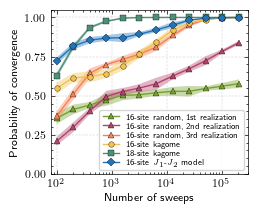

In [106]:
matplotlib.pyplot.close("all")
with plt.style.context(["science", "scatter", style]):
    w, h = style["figure.figsize"]
    fig, ax = plt.subplots(figsize=(0.5 * w, 0.5 * h))
    fig.subplots_adjust(left=0.15, right=0.95, top=1)

    ss = [
        ("sk_16_1.csv", "^", "16-site random, 1st realization"),
        ("sk_16_2.csv", "^", "16-site random, 2nd realization"),
        ("sk_16_3.csv", "^", "16-site random, 3rd realization"),
        ("heisenberg_kagome_16.csv", "o", "16-site kagome"),
        ("heisenberg_kagome_18.csv", "s", "18-site kagome"),
        ("j1j2_square_4x4.csv", "D", r"16-site $J_1$-$J_2$ model"),
    ]
    for s, m, l in ss:
        t = pd.read_csv(prefix / "experiments" / s)
        ax.fill_between(t.number_sweeps, t.acc_prob_mean - 2 * t.acc_prob_std, t.acc_prob_mean + 2 * t.acc_prob_std, alpha=0.4)
        ax.plot(t.number_sweeps, t.acc_prob_mean, label=l + r"\hspace{-15pt}", marker=m,
                markersize=4, markeredgewidth=0.25, markeredgecolor='black')
        
    ax.set_xscale("log"); ax.grid()
    ax.set_xlabel("Number of sweeps"); ax.set_ylabel("Probability of convergence")
    ax.set_xlim((80, 3e5)); ax.set_ylim((0, 1.05))
    ax.legend(fontsize=6, labelspacing=0.2)
    fig.savefig("assets/Figure_2.pgf", backend="pgf")
fig

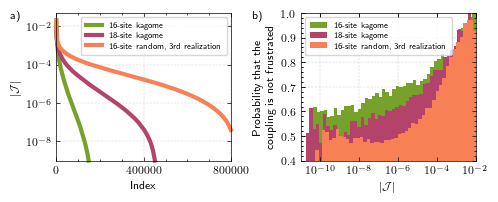

In [107]:
matplotlib.pyplot.close("all")
with plt.style.context(["science", "scatter", style]):
    w, h = style["figure.figsize"]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(1.1 * w, 0.4 * h))
    fig.subplots_adjust(top=1, bottom=0, wspace=0.4)
    ss = [
        ("heisenberg_kagome_16.csv", "16-site kagome"),
        ("heisenberg_kagome_18.csv", "18-site kagome"),
        ("sk_16_3.csv", "16-site random, 3rd realization"),
    ]
    for s, l in ss:
        t = np.loadtxt(prefix / "experiments/couplings" / s)
        t = t[t >= 1e-9][:800000:1000]
        ax1.plot(1e3 * np.arange(len(t)), t, label=l  + r"\hspace{-17pt}", linewidth=3, marker="none", clip_on=False)
        t = pd.read_csv(prefix / "experiments/is_frustrated" / s, names=["J", "p"])
        ax2.bar(t.J[:-1], t.p[:-1], width=np.diff(t.J), label=l + r"\hspace{-17pt}", align="edge", linewidth=0.6, zorder=0.6)

    ax1.set_yscale("log"); ax1.grid()
    ax1.set_xlabel("Index"); ax1.set_ylabel(r"$|\mathcal{J}|$")
    ax1.set_xlim((0, 8e5)); ax1.set_ylim((1e-9, None))
    ax1.set_xticks([0, 400000, 800000])
    ax1.set_yticks([1e-8, 1e-6, 1e-4, 1e-2])
    ax1.legend(fontsize=6, borderpad=0.6, labelspacing=0.3)

    ax2.set_xscale("log"); ax2.set_axisbelow(True); ax2.grid()
    ax2.set_xlabel(r"$|\mathcal{J}|$")
    ax2.set_ylabel(r"\parbox{4cm}{\centering Probability that the\\[-1pt]coupling is not frustrated}")
    ax2.set_xlim((1e-11, 1e-2)); ax2.set_ylim((0.4, 1))
    ax2.set_xticks([1e-10, 1e-8, 1e-6, 1e-4, 1e-2])
    ax2.set_yticks(np.linspace(0.4, 1, 7))
    for c in ax2.spines.values(): c.set_zorder(10)
    for c in [ax2.xaxis, ax2.yaxis]:
        for a in itertools.chain(c.get_ticklines(), c.get_ticklines(minor=True)):
            a.set_zorder(10); ax2.add_artist(a)
    ax2.legend(fontsize=6, borderpad=0.6, labelspacing=0.3)

    ax1.text(-2.1e5, 2.6e-2, "a)", clip_on=False); ax2.text(3e-14, 0.98, "b)", clip_on=False)
    fig.savefig("assets/Figure_3.pgf", backend="pgf")
fig

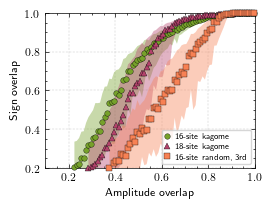

In [108]:
matplotlib.pyplot.close("all")
with plt.style.context(["science", "scatter", style]):
    w, h = style["figure.figsize"]
    fig, ax = plt.subplots(figsize=(0.55 * w, 0.5 * h))
    fig.subplots_adjust(top=0.95)
    ss = [
        ("heisenberg_kagome_16_stats.csv", "o", "16-site kagome"),
        ("j1j2_square_4x4_stats.csv", "^", "18-site kagome"),
        ("heisenberg_kagome_18_stats.csv", "s", "16-site random, 3rd"),
    ]
    for s, m, l in ss:
        t = pd.read_csv(prefix / "experiments/lilo/noise" / s)
        t = t[t["median"] >= 0.2]
        ax.fill_between(t.amplitude_overlap, t.lower, t.upper, alpha=0.4)
        ax.plot(t.amplitude_overlap, t["median"], label=l + r"\hspace{-10pt}", marker=m, linestyle="none",
                markersize=4, markeredgewidth=0.25, markeredgecolor='black', clip_on=False)
    ax.set_axisbelow(True); ax.grid()
    for c in ax.spines.values(): c.set_zorder(0.6)
    ax.set_xlim((0.1, 1)); ax.set_ylim((0.2, 1))
    ax.set_xlabel("Amplitude overlap"); ax.set_ylabel("Sign overlap")
    ax.legend(loc="lower right", fontsize=6, borderpad=0.4, handlelength=0.4, labelspacing=0.3)
    fig.savefig("assets/Figure_4.pgf", backend="pgf")
fig 

In [109]:
def _load(f):
    from glob import iglob
    names = ["size_1", "overlap_1", "size_2", "overlap_2", "size_3", "overlap_3"]
    load = lambda s: pd.read_csv(s, comment="#", memory_map=True, usecols=[0, 2, 6, 8, 12, 14], names=names)
    ts = [load(x) for x in itertools.chain.from_iterable(map(iglob, map(f, ["lilo", "snellius"])))]
    ts = [t for t in ts if len(t) > 0]
    return pd.concat(ts).reset_index(drop=True)

ss = {"pyrochlore": (32, "1e-5"), "kagome": (36, "2e-6"), "sk": (32, "2e-6")}
t = dict()
for key, (n, cutoff) in ss.items():
    basename = f"{key}_{n}"
    if key == "sk": basename += "_1"
    t[key] = _load(lambda s: str(prefix / f"experiments/{s}/{key}/noise_0/cutoff_{cutoff}/{basename}.csv*"))

In [110]:
def _kde(arr, **kwargs): return scipy.stats.gaussian_kde(arr, **kwargs)
def _overlap_pdf(t, **kwargs):
    x = np.linspace(0, 1, 200)
    return np.column_stack([x, _kde(t.overlap_1)(x), _kde(t.overlap_2)(x), _kde(t.overlap_3)(x)])
def _size_pdf(t, **kwargs):
    x, ns = np.linspace(0, 7, 200), [np.log10(n) for n in [t.size_1, t.size_2, t.size_3]]
    return np.column_stack([10**x] + [_kde(n)(x) for n in ns])

In [111]:
def _overlap_ccdf(t):
    xs = np.linspace(0, 1, 200)
    _ccdf = lambda arr: 1 - np.searchsorted(np.sort(arr), xs) / arr.size
    return np.column_stack([xs, _ccdf(t.overlap_1), _ccdf(t.overlap_2), _ccdf(t.overlap_3)])

In [112]:
o = dict((k, _overlap_pdf(v, bw_method=0.025)) for k, v in t.items())
s = dict((k, _size_pdf(v, bw_method=0.05)) for k, v in t.items())
inset = dict((k, _overlap_ccdf(v)) for k, v in t.items())

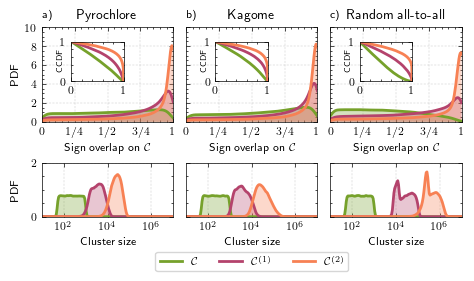

In [113]:
matplotlib.pyplot.close("all")
with plt.style.context(["science", "scatter", style]):
    w, h = style["figure.figsize"]
    fig, axes = plt.subplots(2, 3, figsize=(1.1 * w, 0.5 * w), height_ratios=[7, 4])
    fig.subplots_adjust(hspace=0.55, wspace=0.1)
    
    ax1, ax2, ax3 = axes[0]
    ax1.set_title("Pyrochlore"); ax2.set_title("Kagome"); ax3.set_title("Random all-to-all")
    ax1.text(0.0, 11, "a)"); ax2.text(0.0, 11, "b)"); ax3.text(0.0, 11, "c)");
    for k, ax in [("pyrochlore", ax1), ("kagome", ax2), ("sk", ax3)]:
        axins = ax.inset_axes([2/9, 3/7, 0.4, 0.42], xlim=(0, 1), ylim=(0, 1))
        axins.set_ylabel("CCDF", fontsize=6, labelpad=-2)
        for i in range(3):
            ax.fill_between(o[k][:, 0], o[k][:, 1 + i], alpha=0.3)
            ax.plot(o[k][:, 0], o[k][:, 1 + i], linestyle="-", linewidth=2, marker="none")
            axins.plot(inset[k][:, 0], inset[k][:, 1 + i], linestyle="-", linewidth=2, marker="none")
        ax.set_xlim((0, 1)); ax.set_ylim((0, 10))
        ax.set_xticks(np.linspace(0, 1, 5), labels=["$0$", "$1/4$", "$1/2$", "$3/4$", "$1$"])
        ax.set_yticks(np.linspace(0, 10, 6))
        ax.grid(); ax.set_xlabel(r"Sign overlap on $\mathcal{C}$")
    ax1.set_ylabel("PDF")
    ax2.tick_params(labelleft=False); ax3.tick_params(labelleft=False)
    ax0 = ax1
    
    ax1, ax2, ax3 = axes[1]
    for k, ax in [("pyrochlore", ax1), ("kagome", ax2), ("sk", ax3)]:
        for i, l in zip(range(3), [r"$\mathcal{C}$", r"$\mathcal{C}^{(1)}$", r"$\mathcal{C}^{(2)}$"]):
            ax.fill_between(s[k][:, 0], s[k][:, 1 + i], alpha=0.3)
            ax.plot(s[k][:, 0], s[k][:, 1 + i], label=l, linestyle="-", linewidth=2, marker="none")
        ax.set_xscale("log");
        ax.set_xlim((1e1, 1e7));
        ax.set_ylim((0, 2));
        ax.set_xticks([1e2, 1e4, 1e6]);
        ax.grid(); ax.set_xlabel(r"Cluster size")
    ax1.set_ylabel("PDF")
    ax2.tick_params(labelleft=False); ax3.tick_params(labelleft=False)

    ax2.legend(loc="upper center", ncol=3, bbox_to_anchor=(0.5, -0.55))
    fig.align_ylabels([axes[0][0], axes[1][0]])
    fig.savefig("assets/Figure_6.pgf", backend="pgf")

fig

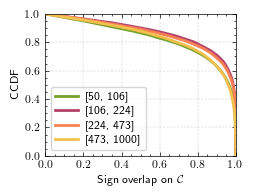

In [114]:
matplotlib.pyplot.close("all")
with plt.style.context(["science", "scatter", style]):
    w, h = style["figure.figsize"]
    fig, ax = plt.subplots(figsize=(0.5 * w, 0.5 * h))
    f = lambda t, l, h: _overlap_ccdf(t[(l <= t.size_1) & (t.size_1 <= h)])
    for l, h in [(50, 106), (106, 224), (224, 473), (473, 1000)]:
        _o = f(t["kagome"], l, h)
        ax.plot(_o[:, 0], _o[:, 3], label=f"[{l}, {h}]", linestyle="-", linewidth=2, marker="none")
    ax.set_xlim((0, 1)); ax.set_ylim((0, 1))
    ax.set_xticks(np.linspace(0, 1, 6))
    # ax.set_yticks(np.linspace(0, 10, 6))
    ax.grid(); ax.set_xlabel(r"Sign overlap on $\mathcal{C}$"); ax.set_ylabel("CCDF")
    ax.legend(labelspacing=0.3)
    fig.savefig("assets/Figure_7.pgf", backend="pgf")
    
fig

    